In [224]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [225]:
metadata=pd.read_excel('PL_XSell_Metadata.xlsx')
metadata

,Column Name,Description
0,CUST_ID,Customer ID - Unique ID
1,TARGET,"Target Field - 1: Responder, 0: Non-Responder"
2,AGE,Age of the customer in years
3,GENDER,Gender
4,BALANCE,Average Monthly Balance
5,OCCUPATION,Occupation
6,AGE_BKT,Age Bucket
7,SCR,Generic Marketing Score
8,HOLDING_PERIOD,Ability to hold money in the account (Range 0 ...
9,ACC_TYPE,Account Type - Saving / Current


In [226]:
df=pd.read_csv('PL_XSELL.csv')
df.head()

,CUST_ID,TARGET,AGE,GENDER,BALANCE,OCCUPATION,AGE_BKT,SCR,HOLDING_PERIOD,ACC_TYPE,...,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,random
0,C7927,0,27,M,3383.75,SELF-EMP,26-30,776,30,SA,...,0,0,13100.0,0.0,0.0,486778.50,0.0,1,1,0.000011
1,C6877,0,47,M,287489.04,SAL,46-50,324,28,SA,...,0,0,6600.0,0.0,0.0,799813.00,0.0,1,0,0.000111
2,C19922,0,40,M,18216.88,SELF-EMP,36-40,603,2,SA,...,0,1,11200.0,561120.0,24660.0,997570.00,0.0,1,1,0.000120
3,C8183,0,53,M,71720.48,SAL,>50,196,13,CA,...,0,0,13050.0,168397.5,15195.0,247168.67,71388.0,1,0,0.000137
4,C12123,0,36,M,1671622.89,PROF,36-40,167,24,SA,...,0,0,0.0,808480.0,0.0,0.00,0.0,1,0,0.000174


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 40 columns):
CUST_ID                     20000 non-null object
TARGET                      20000 non-null int64
AGE                         20000 non-null int64
GENDER                      20000 non-null object
BALANCE                     20000 non-null float64
OCCUPATION                  20000 non-null object
AGE_BKT                     20000 non-null object
SCR                         20000 non-null int64
HOLDING_PERIOD              20000 non-null int64
ACC_TYPE                    20000 non-null object
ACC_OP_DATE                 20000 non-null object
LEN_OF_RLTN_IN_MNTH         20000 non-null int64
NO_OF_L_CR_TXNS             20000 non-null int64
NO_OF_L_DR_TXNS             20000 non-null int64
TOT_NO_OF_L_TXNS            20000 non-null int64
NO_OF_BR_CSH_WDL_DR_TXNS    20000 non-null int64
NO_OF_ATM_DR_TXNS           20000 non-null int64
NO_OF_NET_DR_TXNS           20000 non-null int64
N

In [228]:
df.dtypes

CUST_ID                      object
TARGET                        int64
AGE                           int64
GENDER                       object
BALANCE                     float64
OCCUPATION                   object
AGE_BKT                      object
SCR                           int64
HOLDING_PERIOD                int64
ACC_TYPE                     object
ACC_OP_DATE                  object
LEN_OF_RLTN_IN_MNTH           int64
NO_OF_L_CR_TXNS               int64
NO_OF_L_DR_TXNS               int64
TOT_NO_OF_L_TXNS              int64
NO_OF_BR_CSH_WDL_DR_TXNS      int64
NO_OF_ATM_DR_TXNS             int64
NO_OF_NET_DR_TXNS             int64
NO_OF_MOB_DR_TXNS             int64
NO_OF_CHQ_DR_TXNS             int64
FLG_HAS_CC                    int64
AMT_ATM_DR                    int64
AMT_BR_CSH_WDL_DR             int64
AMT_CHQ_DR                    int64
AMT_NET_DR                  float64
AMT_MOB_DR                    int64
AMT_L_DR                    float64
FLG_HAS_ANY_CHGS            

In [229]:
del df['CUST_ID']

In [230]:
del df['ACC_OP_DATE']

In [231]:
del df['random']

In [232]:
for i in df.columns:
    print(df[i].value_counts())

0    17488
1     2512
Name: TARGET, dtype: int64
28    836
31    779
30    764
32    720
41    712
36    706
29    696
43    673
35    670
51    666
53    630
34    619
45    618
33    616
55    612
27    593
52    580
44    574
37    557
38    555
54    547
50    545
26    545
46    539
40    525
25    523
47    511
42    490
49    480
39    471
48    418
24    381
23    371
22    247
21    231
Name: AGE, dtype: int64
M    14376
F     5433
O      191
Name: GENDER, dtype: int64
0.00          76
475995.49     36
1645982.68    34
820931.13     30
518086.03     25
295709.23     25
537015.73     25
493387.30     25
712086.58     24
1585087.83    24
321857.71     22
283944.02     21
1456311.55    20
260875.74     19
546442.99     19
1136890.47    19
1464278.95    18
905697.11     18
893523.05     17
1512259.16    17
775053.78     16
440072.66     15
1156848.47    15
1044526.80    14
1003089.93    13
3383.75       13
788659.77     13
478599.64     11
262302.98     11
757287.02     11
       

In [233]:
df['FLG_HAS_CC'].dtype

dtype('int64')

In [234]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=df[i].astype('category')
        
df.dtypes

df.TARGET = df.TARGET.astype('category')

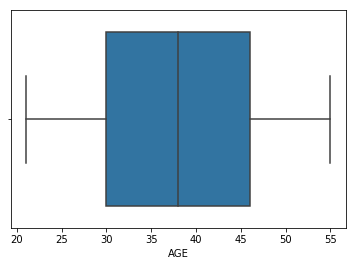

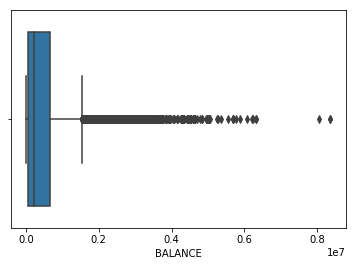

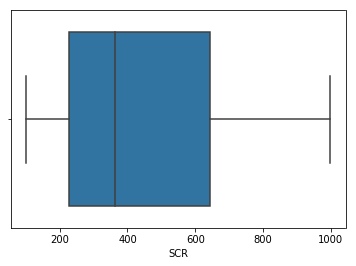

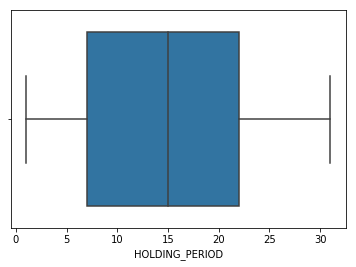

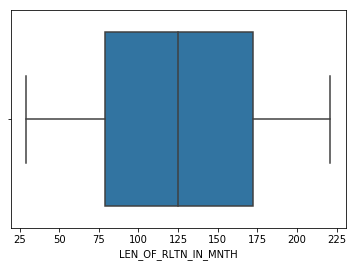

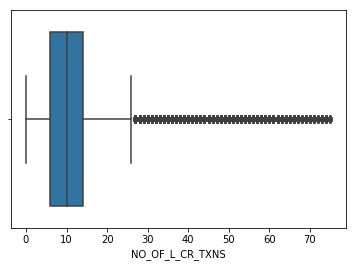

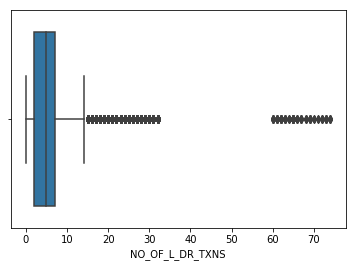

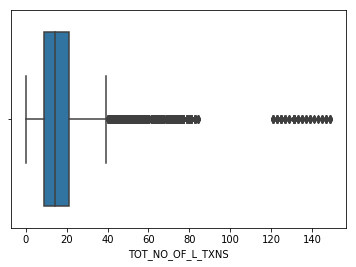

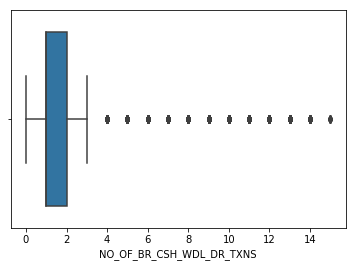

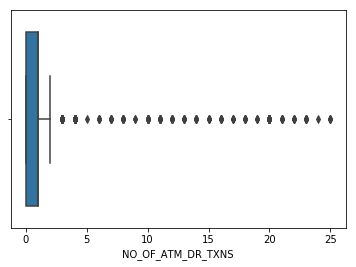

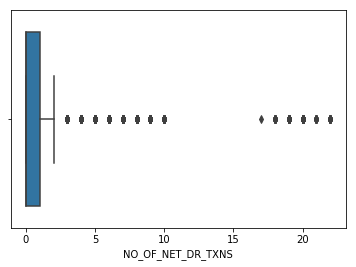

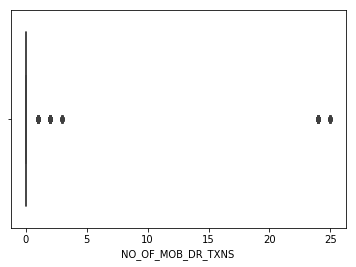

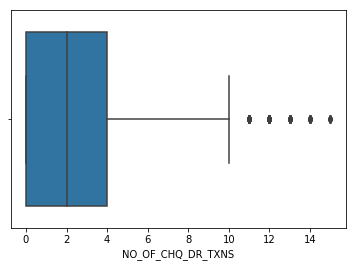

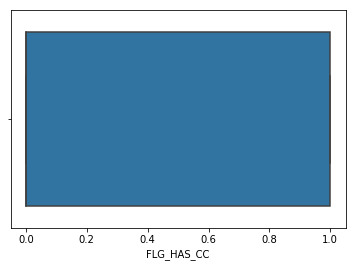

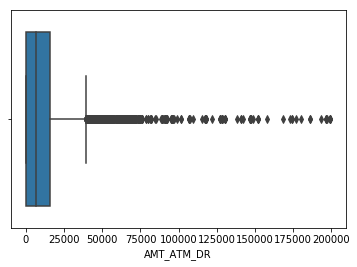

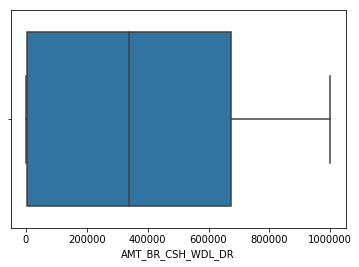

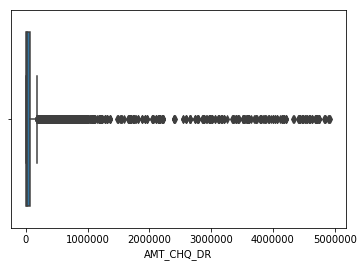

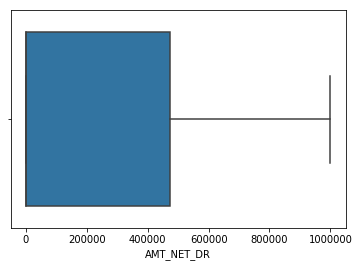

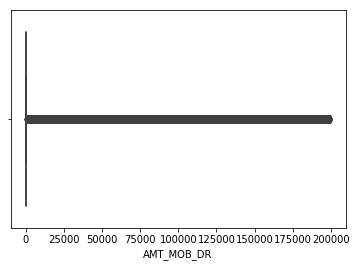

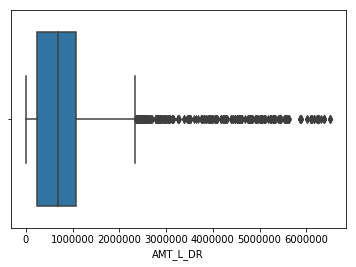

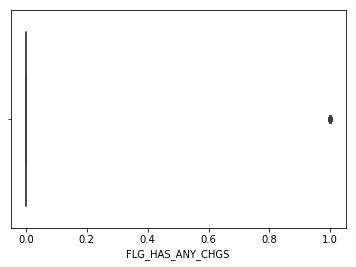

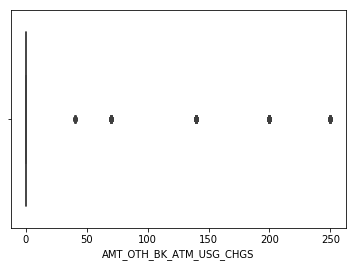

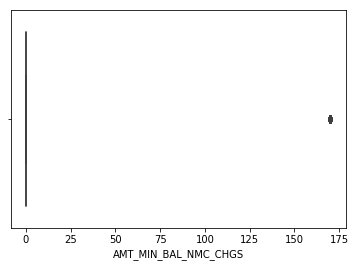

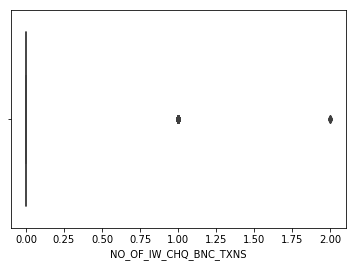

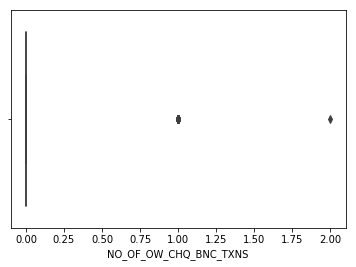

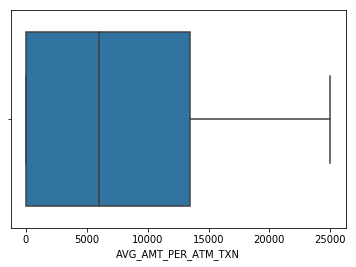

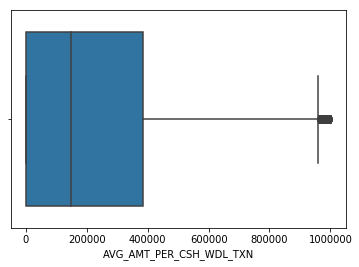

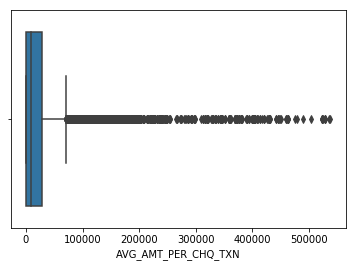

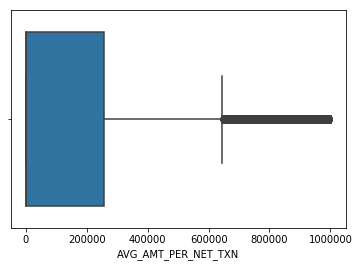

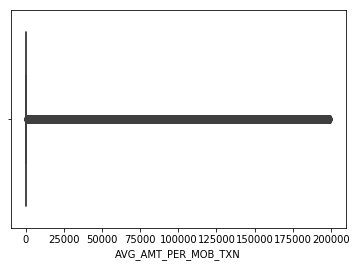

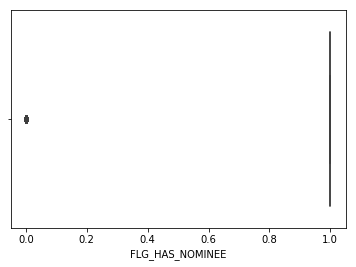

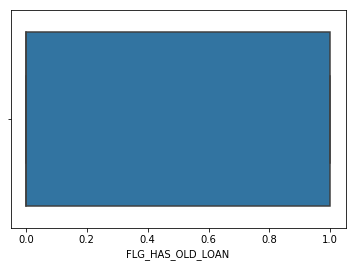

In [235]:
for i in df.columns:
    if df[i].dtype in ('float64','int64'):
        sns.boxplot(df[i].dropna())
        plt.show()

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


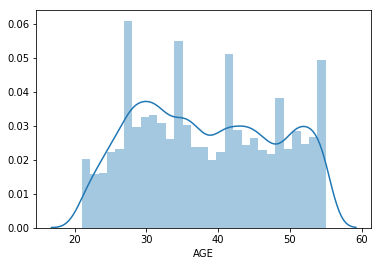

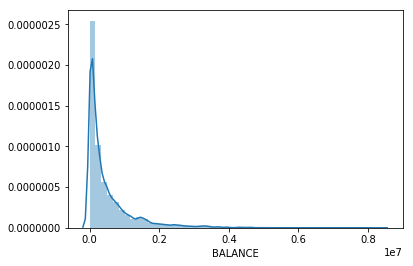

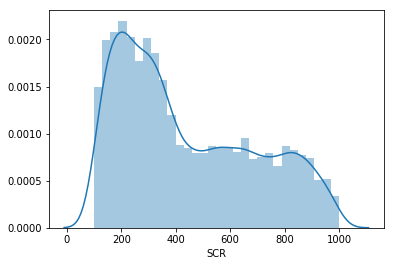

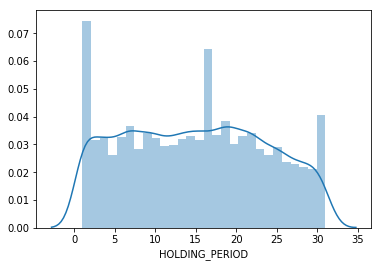

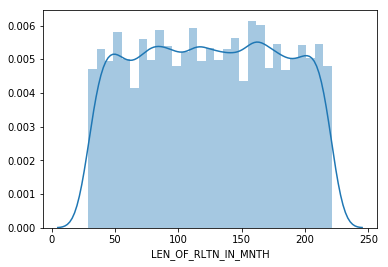

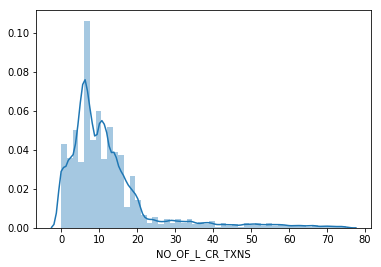

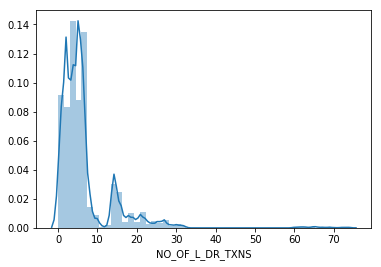

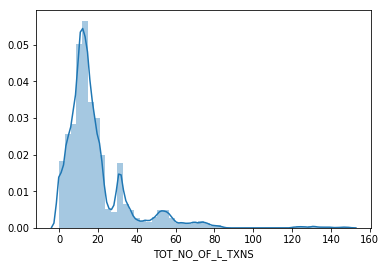

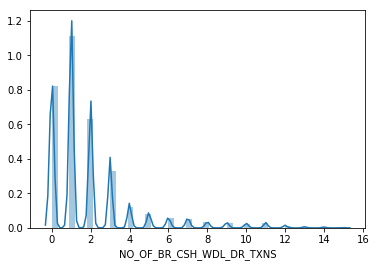

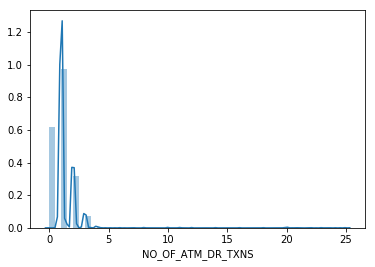

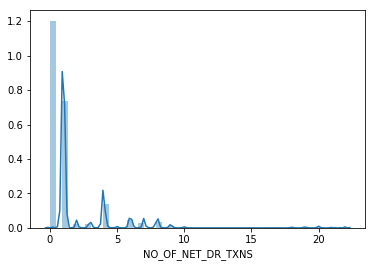

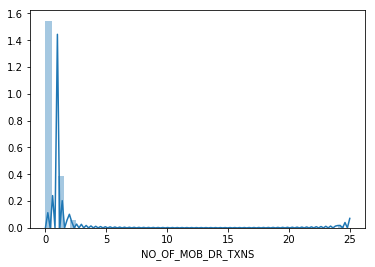

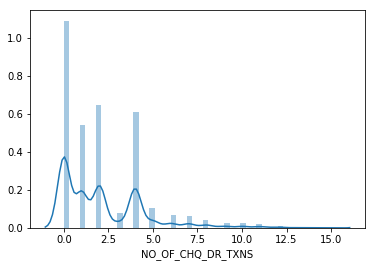

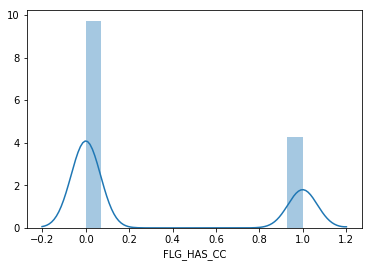

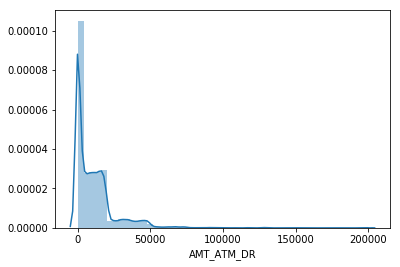

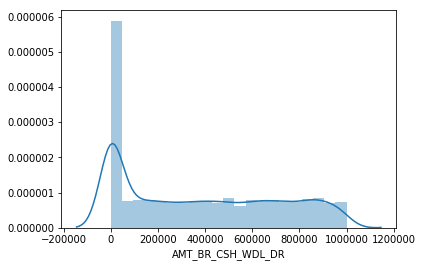

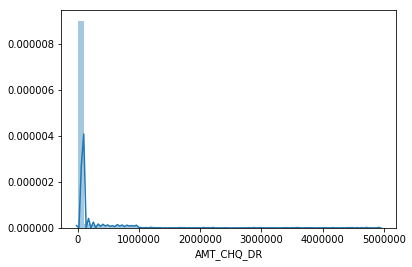

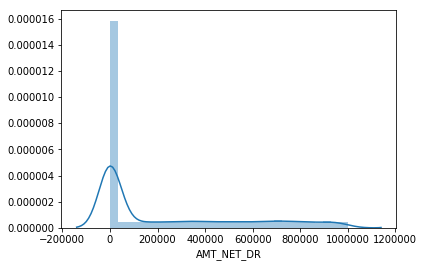

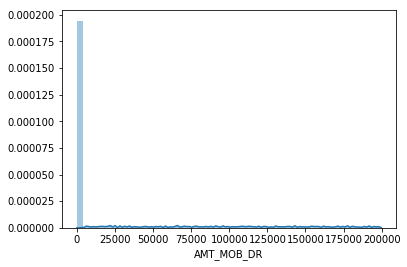

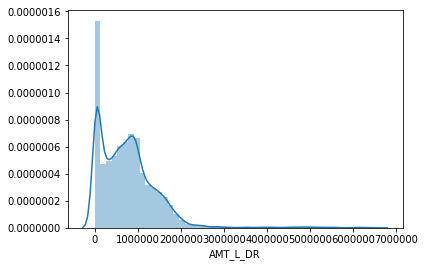

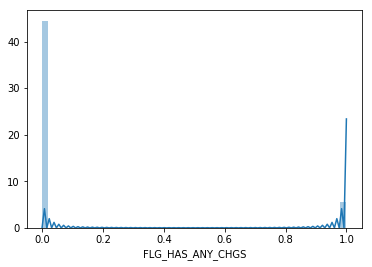

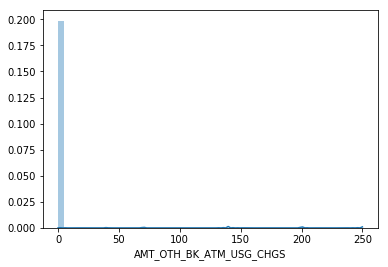

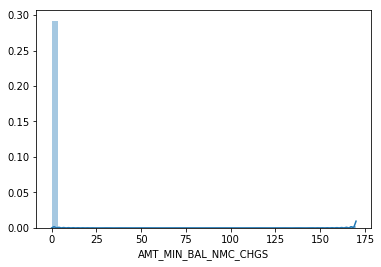

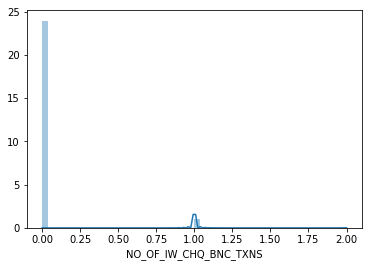

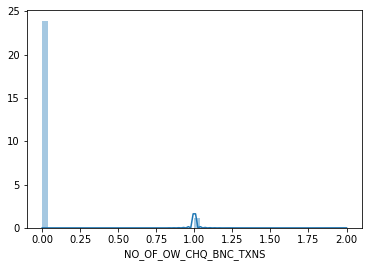

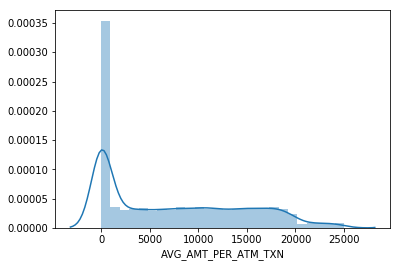

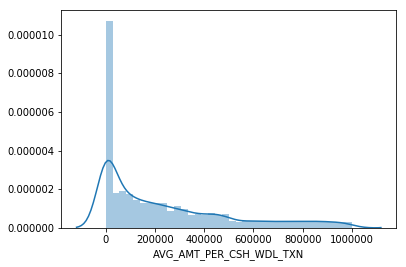

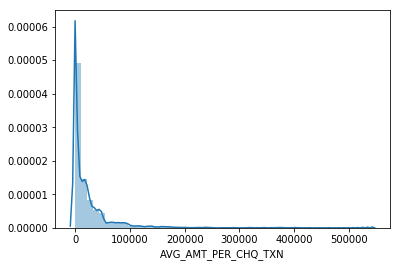

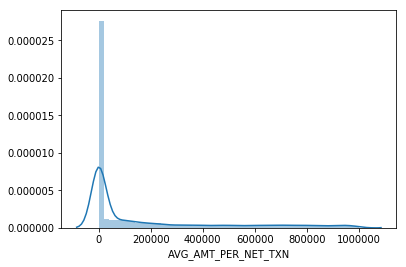

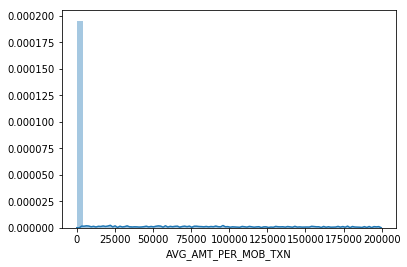

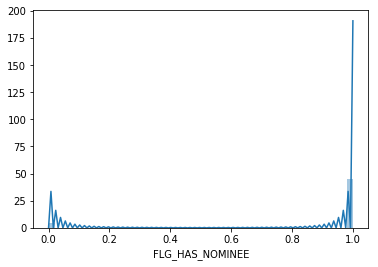

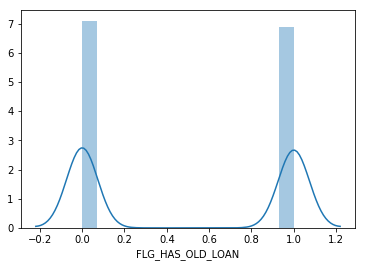

In [236]:
for i in df.columns:
    if df[i].dtype in ('float64','int64'):
        sns.distplot(df[i].dropna())
        plt.show()

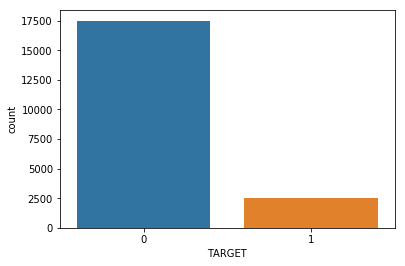

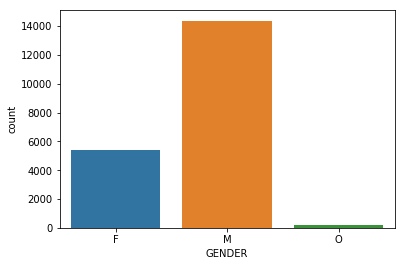

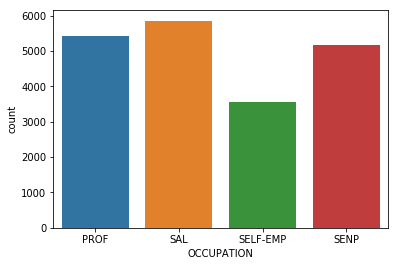

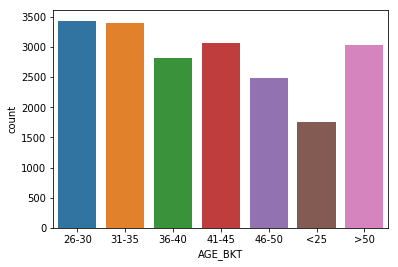

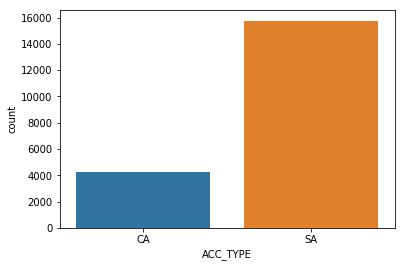

In [237]:
for i in df.columns:
    if df[i].dtype not in ('float64','int64'):
        sns.countplot(df[i].dropna())
        plt.show()

In [238]:
df.groupby('TARGET')['TARGET'].count()/20000*100

TARGET
0    87.44
1    12.56
Name: TARGET, dtype: float64

In [239]:
'''for i in df.columns:
    for j in df.columns:
        plt.figure(figsize=(10,7))
        plt.subplot(121)
        sns.scatterplot( i, j, data=df)
        #plt.subplot(122)
       # sns.scatterplot( j, i , data=df ,color='r')
        plt.show()'''
        

"for i in df.columns:\n    for j in df.columns:\n        plt.figure(figsize=(10,7))\n        plt.subplot(121)\n        sns.scatterplot( i, j, data=df)\n        #plt.subplot(122)\n       # sns.scatterplot( j, i , data=df ,color='r')\n        plt.show()"

In [240]:
df.isnull().sum()

TARGET                      0
AGE                         0
GENDER                      0
BALANCE                     0
OCCUPATION                  0
AGE_BKT                     0
SCR                         0
HOLDING_PERIOD              0
ACC_TYPE                    0
LEN_OF_RLTN_IN_MNTH         0
NO_OF_L_CR_TXNS             0
NO_OF_L_DR_TXNS             0
TOT_NO_OF_L_TXNS            0
NO_OF_BR_CSH_WDL_DR_TXNS    0
NO_OF_ATM_DR_TXNS           0
NO_OF_NET_DR_TXNS           0
NO_OF_MOB_DR_TXNS           0
NO_OF_CHQ_DR_TXNS           0
FLG_HAS_CC                  0
AMT_ATM_DR                  0
AMT_BR_CSH_WDL_DR           0
AMT_CHQ_DR                  0
AMT_NET_DR                  0
AMT_MOB_DR                  0
AMT_L_DR                    0
FLG_HAS_ANY_CHGS            0
AMT_OTH_BK_ATM_USG_CHGS     0
AMT_MIN_BAL_NMC_CHGS        0
NO_OF_IW_CHQ_BNC_TXNS       0
NO_OF_OW_CHQ_BNC_TXNS       0
AVG_AMT_PER_ATM_TXN         0
AVG_AMT_PER_CSH_WDL_TXN     0
AVG_AMT_PER_CHQ_TXN         0
AVG_AMT_PE

In [241]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [242]:
df.head()

,TARGET,AGE,GENDER,BALANCE,OCCUPATION,AGE_BKT,SCR,HOLDING_PERIOD,ACC_TYPE,LEN_OF_RLTN_IN_MNTH,...,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN
0,0,27,M,3383.75,SELF-EMP,26-30,776,30,SA,146,...,0,0,0,13100.0,0.0,0.0,486778.50,0.0,1,1
1,0,47,M,287489.04,SAL,46-50,324,28,SA,104,...,0,0,0,6600.0,0.0,0.0,799813.00,0.0,1,0
2,0,40,M,18216.88,SELF-EMP,36-40,603,2,SA,61,...,0,0,1,11200.0,561120.0,24660.0,997570.00,0.0,1,1
3,0,53,M,71720.48,SAL,>50,196,13,CA,107,...,0,0,0,13050.0,168397.5,15195.0,247168.67,71388.0,1,0
4,0,36,M,1671622.89,PROF,36-40,167,24,SA,185,...,0,0,0,0.0,808480.0,0.0,0.00,0.0,1,0


In [243]:
df.TARGET =df.TARGET.astype('int64')
df.TARGET.dtype

dtype('int64')

In [244]:
y=df.TARGET
df.drop(columns='TARGET',inplace=True)

In [245]:
df.shape

(20000, 36)

In [246]:
df=pd.get_dummies(df,drop_first=True)

In [247]:
df.shape

(20000, 44)

In [248]:
df.head(2)

,AGE,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,...,OCCUPATION_SAL,OCCUPATION_SELF-EMP,OCCUPATION_SENP,AGE_BKT_31-35,AGE_BKT_36-40,AGE_BKT_41-45,AGE_BKT_46-50,AGE_BKT_<25,AGE_BKT_>50,ACC_TYPE_SA
0,27,3383.75,776,30,146,7,3,10,0,1,...,0,1,0,0,0,0,0,0,0,1
1,47,287489.04,324,28,104,8,2,10,0,1,...,1,0,0,0,0,0,1,0,0,1


In [249]:
df.dtypes

AGE                           int64
BALANCE                     float64
SCR                           int64
HOLDING_PERIOD                int64
LEN_OF_RLTN_IN_MNTH           int64
NO_OF_L_CR_TXNS               int64
NO_OF_L_DR_TXNS               int64
TOT_NO_OF_L_TXNS              int64
NO_OF_BR_CSH_WDL_DR_TXNS      int64
NO_OF_ATM_DR_TXNS             int64
NO_OF_NET_DR_TXNS             int64
NO_OF_MOB_DR_TXNS             int64
NO_OF_CHQ_DR_TXNS             int64
FLG_HAS_CC                    int64
AMT_ATM_DR                    int64
AMT_BR_CSH_WDL_DR             int64
AMT_CHQ_DR                    int64
AMT_NET_DR                  float64
AMT_MOB_DR                    int64
AMT_L_DR                    float64
FLG_HAS_ANY_CHGS              int64
AMT_OTH_BK_ATM_USG_CHGS       int64
AMT_MIN_BAL_NMC_CHGS          int64
NO_OF_IW_CHQ_BNC_TXNS         int64
NO_OF_OW_CHQ_BNC_TXNS         int64
AVG_AMT_PER_ATM_TXN         float64
AVG_AMT_PER_CSH_WDL_TXN     float64
AVG_AMT_PER_CHQ_TXN         

In [250]:

x=df
sc=StandardScaler()
x_std=sc.fit_transform(x)      
# scaling of Input, don't scale output(because it is categorical), we can also use Z score, this is another method


x_train,x_test,y_train,y_test= train_test_split(x_std,y,test_size=0.3,random_state=0)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [251]:
rfmodel=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0)
dtmodel=DecisionTreeClassifier(criterion='entropy',random_state=0)



In [252]:
dtmodel.fit(x_train,y_train)
rfmodel.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [253]:
models=[]
models.append(('Decision Tree',dtmodel))
models.append(('Random Forest',rfmodel))


Decision Tree: 0.942450 ,(variance error is 0.004176)
Random Forest: 0.969600 ,(variance error is 0.003797)


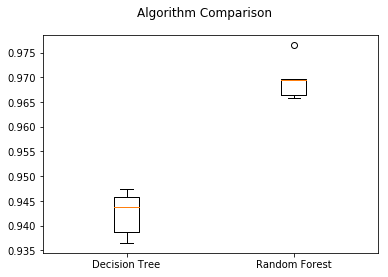

In [254]:
from sklearn import model_selection

results=[]
names=[]
scoring='accuracy'
for name, model in models:
    kfold=model_selection.KFold(n_splits=5,random_state=2)
    cv_results=model_selection.cross_val_score(model,x_std,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f ,(variance error is %f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

fig=plt.figure()
fig.suptitle("Algorithm Comparison")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Random Forest has a low variance error than Decision Tree and high accuracy than Decision Tree

In [255]:
params= { 'max_depth':np.arange(1,20)}

In [256]:
rfmodel=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0)

In [257]:
GS=GridSearchCV(rfmodel,params,cv=5)
GS.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [258]:
GS.best_params_

{'max_depth': 19}

In [259]:
rfmodel=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth= 19,random_state=0)

In [260]:
rfmodel.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=19, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [263]:
print(pd.DataFrame(rfmodel.feature_importances_,columns=["IMP"],index=df.columns)) 
featuresimp=pd.DataFrame(rfmodel.feature_importances_,columns=["IMP"],index=df.columns)

                               IMP
AGE                       0.045577
BALANCE                   0.065465
SCR                       0.065034
HOLDING_PERIOD            0.059584
LEN_OF_RLTN_IN_MNTH       0.058096
NO_OF_L_CR_TXNS           0.044701
NO_OF_L_DR_TXNS           0.027826
TOT_NO_OF_L_TXNS          0.047619
NO_OF_BR_CSH_WDL_DR_TXNS  0.018261
NO_OF_ATM_DR_TXNS         0.011030
NO_OF_NET_DR_TXNS         0.007859
NO_OF_MOB_DR_TXNS         0.003931
NO_OF_CHQ_DR_TXNS         0.016716
FLG_HAS_CC                0.018083
AMT_ATM_DR                0.043417
AMT_BR_CSH_WDL_DR         0.045256
AMT_CHQ_DR                0.037672
AMT_NET_DR                0.030991
AMT_MOB_DR                0.017647
AMT_L_DR                  0.057484
FLG_HAS_ANY_CHGS          0.006138
AMT_OTH_BK_ATM_USG_CHGS   0.000361
AMT_MIN_BAL_NMC_CHGS      0.000419
NO_OF_IW_CHQ_BNC_TXNS     0.003303
NO_OF_OW_CHQ_BNC_TXNS     0.002815
AVG_AMT_PER_ATM_TXN       0.040367
AVG_AMT_PER_CSH_WDL_TXN   0.043323
AVG_AMT_PER_CHQ_TXN 

In [264]:
featuresimp=featuresimp.sort_values('IMP',ascending=False)
featuresimp

,IMP
BALANCE,0.065465
SCR,0.065034
HOLDING_PERIOD,0.059584
LEN_OF_RLTN_IN_MNTH,0.058096
AMT_L_DR,0.057484
TOT_NO_OF_L_TXNS,0.047619
AGE,0.045577
AMT_BR_CSH_WDL_DR,0.045256
NO_OF_L_CR_TXNS,0.044701
AMT_ATM_DR,0.043417


In [265]:
for i in range(0,11):
    col=featuresimp.index

In [267]:
col

Index(['BALANCE', 'SCR', 'HOLDING_PERIOD', 'LEN_OF_RLTN_IN_MNTH', 'AMT_L_DR',
       'TOT_NO_OF_L_TXNS', 'AGE', 'AMT_BR_CSH_WDL_DR', 'NO_OF_L_CR_TXNS',
       'AMT_ATM_DR', 'AVG_AMT_PER_CSH_WDL_TXN', 'AVG_AMT_PER_ATM_TXN',
       'AMT_CHQ_DR', 'AVG_AMT_PER_CHQ_TXN', 'AMT_NET_DR',
       'AVG_AMT_PER_NET_TXN', 'NO_OF_L_DR_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS',
       'FLG_HAS_CC', 'AMT_MOB_DR', 'NO_OF_CHQ_DR_TXNS', 'AVG_AMT_PER_MOB_TXN',
       'OCCUPATION_SELF-EMP', 'NO_OF_ATM_DR_TXNS', 'FLG_HAS_OLD_LOAN',
       'GENDER_M', 'OCCUPATION_SAL', 'AGE_BKT_41-45', 'NO_OF_NET_DR_TXNS',
       'OCCUPATION_SENP', 'ACC_TYPE_SA', 'AGE_BKT_31-35', 'FLG_HAS_ANY_CHGS',
       'AGE_BKT_46-50', 'AGE_BKT_36-40', 'AGE_BKT_>50', 'FLG_HAS_NOMINEE',
       'AGE_BKT_<25', 'NO_OF_MOB_DR_TXNS', 'NO_OF_IW_CHQ_BNC_TXNS',
       'NO_OF_OW_CHQ_BNC_TXNS', 'GENDER_O', 'AMT_MIN_BAL_NMC_CHGS',
       'AMT_OTH_BK_ATM_USG_CHGS'],
      dtype='object')

In [268]:
x=df.loc[:,col]

sc=StandardScaler()
x_std=sc.fit_transform(x)   
x_train,x_test,y_train,y_test= train_test_split(x_std,y,test_size=0.3,random_state=0)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [269]:
params= { 'max_depth':np.arange(1,20)}
rfmodel=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0)
GS=GridSearchCV(rfmodel,params,cv=5)
GS.fit(x_train,y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [270]:
GS.best_params_


{'max_depth': 19}

In [271]:
rfmodel=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth= 19,random_state=0)
rfmodel.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=19, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [272]:
kfold=model_selection.KFold(n_splits=5,random_state=0)
cv_results=model_selection.cross_val_score(rfmodel,x_std,y,cv=kfold,scoring='accuracy')

In [273]:
cv_results.mean()    # Mean Accuraccy score

0.96595

In [274]:
# From the above the colums to be considered are 
col[:11]

Index(['BALANCE', 'SCR', 'HOLDING_PERIOD', 'LEN_OF_RLTN_IN_MNTH', 'AMT_L_DR',
       'TOT_NO_OF_L_TXNS', 'AGE', 'AMT_BR_CSH_WDL_DR', 'NO_OF_L_CR_TXNS',
       'AMT_ATM_DR', 'AVG_AMT_PER_CSH_WDL_TXN'],
      dtype='object')

In [275]:
ypred=rfmodel.predict(x_test)

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(-0.05, 1.05)

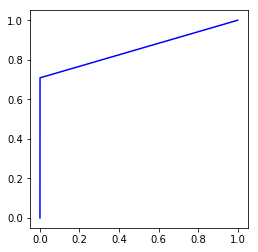

In [276]:
fpr,tpr,threshold=metrics.roc_curve(y_test,ypred)   # fpr -False posititve Ratio, tpr- True positive ratio
plt.plot(fpr,tpr,label="ROC curve",color="b")
plt.axes().set_aspect("equal")
plt.xlim([-0.05,1.05])  # if we donot mention this the graph will start from 0 and end in 1
plt.ylim([-0.05,1.05]) 

In [277]:
metrics.auc(fpr,tpr) 

0.8541585183007354